In [1]:
import PyComplexHeatmap as pch
import pandas as pd
from pathlib import Path
import re
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import muon as mu

2024-01-31 16:37:03.824617: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-31 16:37:05.166008: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [155]:
!mkdir ../result/24.1.31_fig5_trajmap_plot

In [456]:
sc.settings.figdir="../result/24.1.31_fig5_trajmap_plot"

In [2]:
trajMap=mu.read_h5mu("../../important_processed_data/12.30_trajMap.h5mu")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [60]:
trajMap.obs["Lineage"]

Bmsc2019_Regev_b3_sep_Chondro                                       Chondro
BmscEndosteal_Ono_Fgfr3CE_sep_Chondro                               Chondro
BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro                        Chondro
BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro                         Chondro
BmscEndosteal_Ono_Gas1CE_sep_Chondro                                Chondro
                                                                    ...    
Metaphysis_Yang_4_sep_Fibroblast                                 Fibroblast
Metaphysis_Yang_sorted_sep_Fibroblast                            Fibroblast
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_sep_Fibroblast    Fibroblast
Septoclasts_Kishor_Longbone2_sep_Fibroblast                      Fibroblast
Septoclasts_Kishor_Pdgfra_sep_Fibroblast                         Fibroblast
Name: Lineage, Length: 121, dtype: category
Categories (4, object): ['Chondro', 'Fibroblast', 'Lepr_BMSC', 'Mesenchyme']

In [3]:
travModel=pd.read_csv("../processed_data/12.12_TRAV/24.1.31_ravMatrix.csv",index_col=0)

In [14]:
RAVname = [f"TRAV{i}" for i in range(1, travModel.shape[1] + 1)]


In [16]:
RAVname

['TRAV1',
 'TRAV2',
 'TRAV3',
 'TRAV4',
 'TRAV5',
 'TRAV6',
 'TRAV7',
 'TRAV8',
 'TRAV9',
 'TRAV10',
 'TRAV11',
 'TRAV12',
 'TRAV13',
 'TRAV14',
 'TRAV15',
 'TRAV16',
 'TRAV17',
 'TRAV18',
 'TRAV19',
 'TRAV20',
 'TRAV21',
 'TRAV22',
 'TRAV23',
 'TRAV24',
 'TRAV25',
 'TRAV26',
 'TRAV27',
 'TRAV28',
 'TRAV29',
 'TRAV30',
 'TRAV31',
 'TRAV32',
 'TRAV33',
 'TRAV34',
 'TRAV35',
 'TRAV36',
 'TRAV37',
 'TRAV38',
 'TRAV39',
 'TRAV40',
 'TRAV41',
 'TRAV42',
 'TRAV43',
 'TRAV44',
 'TRAV45',
 'TRAV46',
 'TRAV47',
 'TRAV48',
 'TRAV49',
 'TRAV50',
 'TRAV51',
 'TRAV52',
 'TRAV53',
 'TRAV54',
 'TRAV55',
 'TRAV56',
 'TRAV57',
 'TRAV58',
 'TRAV59',
 'TRAV60',
 'TRAV61',
 'TRAV62',
 'TRAV63',
 'TRAV64',
 'TRAV65',
 'TRAV66',
 'TRAV67',
 'TRAV68',
 'TRAV69',
 'TRAV70',
 'TRAV71',
 'TRAV72',
 'TRAV73',
 'TRAV74',
 'TRAV75',
 'TRAV76',
 'TRAV77',
 'TRAV78',
 'TRAV79',
 'TRAV80',
 'TRAV81',
 'TRAV82',
 'TRAV83',
 'TRAV84',
 'TRAV85',
 'TRAV86',
 'TRAV87',
 'TRAV88',
 'TRAV89',
 'TRAV90',
 'TRAV91',
 'TRAV92

In [17]:
travModel.columns=RAVname

In [227]:
# Extract the column
geneList = travModel.loc[:, "TRAV143"]
geneList = geneList.sort_values(ascending=False)
geneList=geneList.index[0:20]

In [30]:
coorDf=pd.read_csv("../processed_data/12.9_trajMap/12.9_coorDf.csv",index_col=0)
peakDf=pd.read_csv("../processed_data/12.9_trajMap/12.9_maxDf.csv",index_col=0)
exprDf=pd.read_csv("../processed_data/12.9_trajMap/12.9_sumDf.csv",index_col=0)

In [33]:

coorDf_sqrt = np.where(coorDf >= 0, np.sqrt(coorDf), -np.sqrt(-coorDf))
coorDf_sqrt=pd.DataFrame(coorDf_sqrt)
coorDf_sqrt.columns=coorDf.columns
coorDf_sqrt.index=coorDf.index
# Function to row scale using Z-score
def row_scale(row):
    return (row - row.mean()) / row.std()

# Apply the row scaling function to each row
scaled_df = exprDf.apply(row_scale, axis=1)
#coorDf_scale=coorDf_sqrt.apply(row_scale, axis=1)
coorDf_scale=coorDf_sqrt



/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


In [104]:
lineageAnno=trajMap.obs["Lineage"]
import random
# Get unique values in the array
unique_values = set(lineageAnno)

# Randomly select 5 samples from each unique value
selected_samples = {value: random.sample([index for index, element in enumerate(lineageAnno) if element == value], 5) for value in unique_values}
combined_list = [value for values in selected_samples.values() for value in values]



In [34]:
scaled_df2 = exprDf.apply(lambda row: (row) / (row.max()), axis=1)

In [112]:
def makeLong(gene,sampleIndex):
    selectCoor=coorDf_scale.loc[gene]
    selectExpr=scaled_df2.loc[gene]
    selectPeak=peakDf.loc[gene]
    selectCoor=selectCoor.iloc[:,sampleIndex]
    selectExpr=selectExpr.iloc[:,sampleIndex]
    selectPeak=selectPeak.iloc[:,sampleIndex]
    coorLong=selectCoor.stack().reset_index(name="Coor")
    exprLong=selectExpr.stack().reset_index(name="Expr")
    peakLong=selectPeak.stack().reset_index(name="Peak")
    peakLong['Stage']=peakLong.Peak.apply(lambda x:'End' if x>=7 else 'Middle' if x >= 3 else 'Start')
    combineDf=coorLong
    combineDf["Expr"]=exprLong['Expr']
    combineDf["Peak"]=peakLong['Stage']
    return(combineDf)

In [113]:
LeprDf=makeLong(geneList,combined_list)

In [114]:
sampleAnnpo=lineageAnno[combined_list]

In [116]:
col_ha = pch.HeatmapAnnotation(OPCST=pch.anno_simple(sampleAnnpo,cmap='Set1',legend=False,add_text=True),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

In [142]:
NMFScore=pd.DataFrame(range(20))
NMFScore.index=geneList

In [150]:
geneList

Index(['Cadm3', 'Dusp10', 'F3', 'Hist1h1b', 'C1qa', 'Rad51ap1', 'Gm17455',
       'Col16a1', 'Spc25', 'Ckap2l', 'Sbsn', 'Meox2', 'Prkg2', 'Scg3', 'H19',
       'Nrn1', 'Lrp4', 'Postn', 'Col25a1', 'Ccnd1'],
      dtype='object')

In [148]:
row_ha = pch.HeatmapAnnotation(NMFscore=pch.anno_simple(NMFScore,cmap='Reds'),legend=False,add_text=False,
                              axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left'})

In [153]:
colSplitOrder=[ 'Lepr_BMSC','Chondro', 'Fibroblast', 'Mesenchyme']

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 12.172222222222222 mm


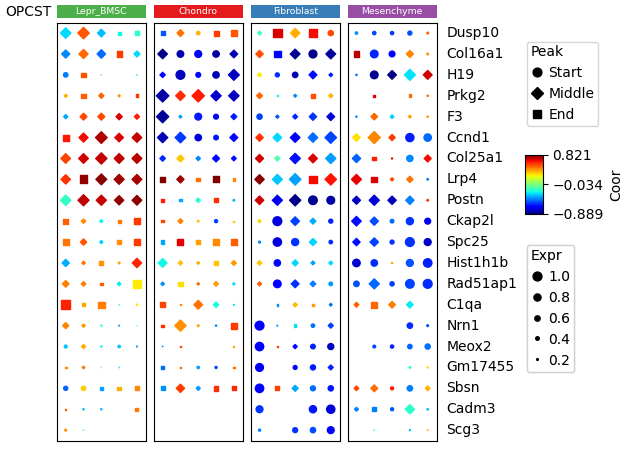

In [156]:
plt.figure(figsize=(5,5))
cm = pch.DotClustermapPlotter(LeprDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s="Expr",
                               marker={'Start':'o','Middle':'D','End':'s'},row_dendrogram=False,
                              col_split_gap=2, col_split=sampleAnnpo,ratio=40,
                              top_annotation=col_ha,col_split_order=colSplitOrder,col_cluster=True,row_cluster=True,
                              show_rownames=True,show_colnames=False,spines=True)
plt.savefig("../result/24.1.31_fig5_trajmap_plot/lepr_dotplot.pdf")
plt.show()

## summarise module dot

In [165]:
trav=trajMap["TRAV"]

In [171]:
trav.obs_names

Index(['Bmsc2019_Regev_b3_sep_Chondro',
       'BmscEndosteal_Ono_Fgfr3CE_sep_Chondro',
       'BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro',
       'BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro',
       'BmscEndosteal_Ono_Gas1CE_sep_Chondro',
       'BmscEndosteal_Ono_Prrx1cre18M_sep_Chondro',
       'BmscEndosteal_Ono_Prrx1creP21_sep_Chondro',
       'BmscEndosteal_Ono_Prrx1creP21multiome_sep_Chondro',
       'BmscTime_Zhong_16M_sep_Chondro', 'BmscTime_Zhong_1M_sep_Chondro',
       ...
       'BmscTime_Zhong_1.5M_sep_Fibroblast',
       'BmscTime_Zhong_16M_sep_Fibroblast', 'BmscTime_Zhong_1M_sep_Fibroblast',
       'BmscTime_Zhong_3M_sep_Fibroblast', 'Metaphysis_Yang_3_sep_Fibroblast',
       'Metaphysis_Yang_4_sep_Fibroblast',
       'Metaphysis_Yang_sorted_sep_Fibroblast',
       'PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_sep_Fibroblast',
       'Septoclasts_Kishor_Longbone2_sep_Fibroblast',
       'Septoclasts_Kishor_Pdgfra_sep_Fibroblast'],
      dtype='object', length=121)

In [177]:
travScore=pd.DataFrame(trav.X)
travScore.columns=RAVname
travScore.index=trav.obs_names



In [184]:
selectSampleName=travScore["TRAV143"].sort_values(ascending=False).index[0:5]

In [194]:
CoorSelectLepr=coorDf_scale.loc[geneList,selectSampleName]
PeakSelectLepr=peakDf.loc[geneList,selectSampleName]
ExprSelectLepr=peakDf.loc[geneList,selectSampleName]


In [207]:
sc.tl.rank_genes_groups(trav, 'Lineage')

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


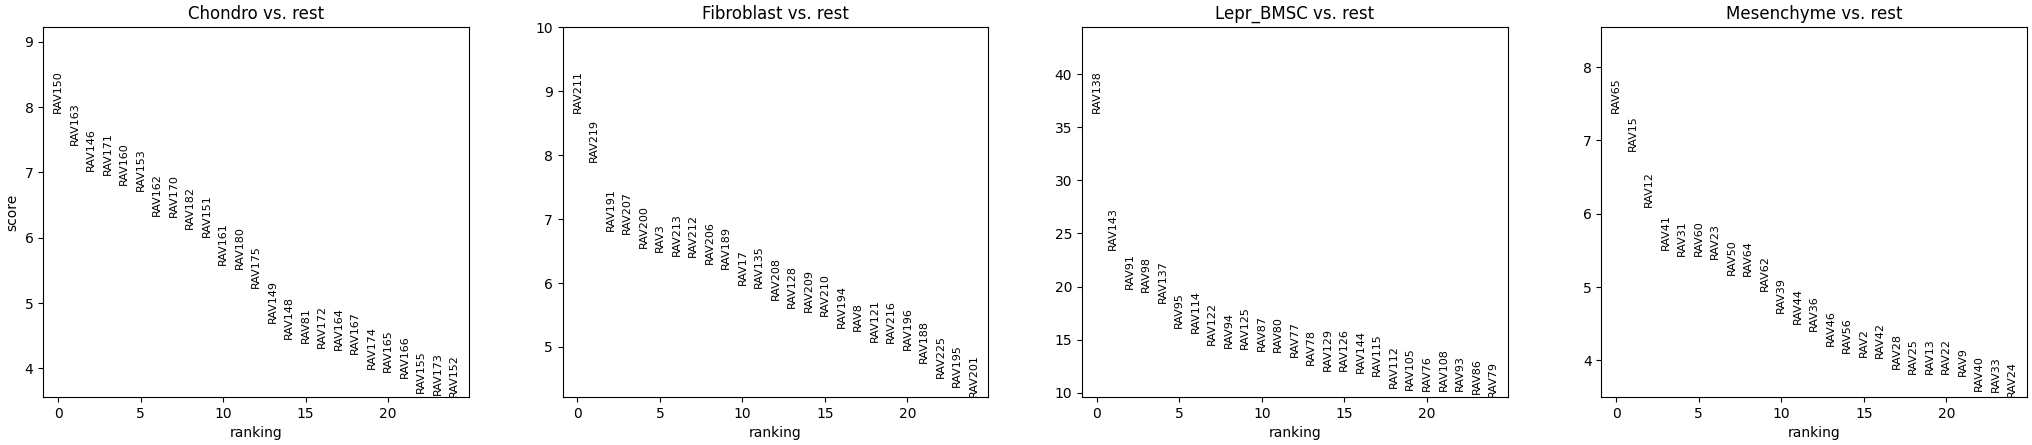

In [208]:
sc.pl.rank_genes_groups(trav, n_genes=25, sharey=False)

In [406]:
leprDeg=sc.get.rank_genes_groups_df(trav,group="Lepr_BMSC")

In [458]:
leprSpecific=leprDeg['names'][0:10]

In [459]:
leprSpecific

0    RAV138
1    RAV143
2     RAV91
3     RAV98
4    RAV137
5     RAV95
6    RAV114
7    RAV122
8     RAV94
9    RAV125
Name: names, dtype: object

In [409]:
leprDeg[0:25]

names     scores  logfoldchanges         pvals     pvals_adj
0   RAV138  36.402493             NaN  7.840587e-61  1.771973e-58
1   RAV143  23.505068             NaN  2.905460e-35  2.188780e-33
2    RAV91  19.776251             NaN  3.072407e-39  3.471820e-37
3    RAV98  19.486464             NaN  1.086615e-33  6.139373e-32
4   RAV137  18.463587             NaN  5.029971e-32  2.273547e-30
5    RAV95  16.119135             NaN  2.614358e-28  9.847414e-27
6   RAV114  15.651731             NaN  1.119609e-27  3.614738e-26
7   RAV122  14.548570             NaN  3.130230e-26  8.842901e-25
8    RAV94  14.267189             NaN  3.515297e-24  6.111208e-23
9   RAV125  14.108529             NaN  4.827210e-26  1.028117e-24
10   RAV87  13.991455             NaN  5.004109e-26  1.028117e-24
11   RAV80  13.882456             NaN  3.970029e-26  9.969184e-25
12   RAV77  13.378859             NaN  1.808166e-25  3.405379e-24
13   RAV78  12.601333             NaN  1.190595e-23  1.921960e-22
14  RAV129  12.046583             NaN  2.332689e-20  3.294923e-19
15  RAV126  12.027201             NaN  5.584638e-21  8.414188e-20
16  RAV144  11.864678             NaN  6.940920e-20  9.227340e-19
17  RAV115  11.566983             NaN  1.704716e-18  2.140366e-17
18  RAV112  10.442571             NaN  3.770036e-18  4.484358e-17
19  RAV105  10.228355             NaN  7.332775e-18  7.891462e-17
20   RAV76  10.185352             NaN  1.453810e-17  1.489984e-16
21  RAV108  10.180457             NaN  7.221548e-18  7.891462e-17
22   RAV93  10.134946             NaN  1.516356e-17  1.489984e-16
23   RAV86   9.919474             NaN  1.673325e-14  1.400635e-13
24   RAV79   9.619366             NaN  1.935734e-16  1.822816e-15

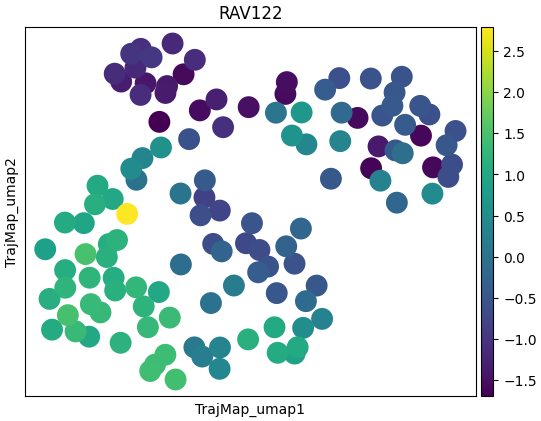

In [421]:
sc.pl.embedding(trav,color="RAV122",basis="TrajMap_umap")

In [213]:
leprRAVMat=sc.get.rank_genes_groups_df(trav,group="Lepr_BMSC")[0:10]

In [214]:
leprRAVMat.to_csv("../processed_data/12.12_TRAV/1.31_leprTRAVDeg.csv")

In [223]:
RAVselect="T"+leprRAVMat.names

In [224]:
RAVsample=RAVselect[0]

In [225]:
selectSampleName=travScore[RAVsample].sort_values(ascending=False).index[0:5]

In [254]:
RAVselect

0    TRAV138
1    TRAV143
2     TRAV91
3     TRAV98
4    TRAV137
5     TRAV95
6    TRAV114
7    TRAV122
8     TRAV94
9    TRAV125
Name: names, dtype: object

In [279]:
peakList=[]
coorList=[]
exprList=[]
for i in RAVselect:
    RAVsample=i
    # Extract the column
    geneSelectTop20 = travModel.loc[:, RAVsample]
    geneSelectTop20 = geneSelectTop20.sort_values(ascending=False)
    geneSelectTop20=geneSelectTop20.index[0:20]
    CoorSelectLepr=coorDf_scale.loc[geneSelectTop20,selectSampleName]
    PeakSelectLepr=peakDf.loc[geneSelectTop20,selectSampleName]
    PeakSelectLepr=PeakSelectLepr.applymap(lambda x:'End' if x>=7 else 'Middle' if x >= 3 else 'Start')
    PeakSelectLeprLong=pd.melt(PeakSelectLepr, value_vars=PeakSelectLepr.columns)
    ExprSelectLepr=scaled_df2.loc[geneSelectTop20,selectSampleName]
    peakMean=PeakSelectLeprLong.iloc[:,1].mode()
    coorMean=np.mean(CoorSelectLepr)
    exprMean=np.mean(ExprSelectLepr)
    peakList.append(peakMean)
    coorList.append(coorMean)
    exprList.append(exprMean)

In [281]:
peakList

[0    Start
 Name: value, dtype: object,
 0    Middle
 Name: value, dtype: object,
 0    End
 Name: value, dtype: object,
 0    Start
 Name: value, dtype: object,
 0    Start
 Name: value, dtype: object,
 0    Middle
 Name: value, dtype: object,
 0    End
 Name: value, dtype: object,
 0    Start
 Name: value, dtype: object,
 0    Middle
 Name: value, dtype: object,
 0    End
 Name: value, dtype: object]

In [290]:
coorDfLepr.stack()

       names  
Score  TRAV138   -0.292378
       TRAV143    0.066575
       TRAV91     0.648983
       TRAV98    -0.387805
       TRAV137   -0.181301
       TRAV95     0.130933
       TRAV114    0.294051
       TRAV122   -0.170239
       TRAV94     0.112555
       TRAV125    0.531631
dtype: float64

In [293]:
coorDfLepr=pd.DataFrame(coorList).T
coorDfLepr.columns=RAVselect
coorDfLepr.index=["Score"]
peakDfLepr=pd.DataFrame(peakList).T
peakDfLepr.columns=RAVselect
peakDfLepr.index=["Score"]
exprDfLepr=pd.DataFrame(exprList).T
exprDfLepr.columns=RAVselect
exprDfLepr.index=["Score"]
def makeLongSum():
    coorLong=coorDfLepr.stack().reset_index(name="Coor")
    exprLong=exprDfLepr.stack().reset_index(name="Expr")
    peakLong=peakDfLepr.stack().reset_index(name="Peak")
    combineDf=coorLong
    combineDf["Expr"]=exprLong['Expr']
    combineDf["Peak"]=peakLong['Peak']
    return(combineDf)

In [294]:
leprSumDf=makeLongSum()

In [324]:
leprSumDf["names"]=pd.Categorical(leprSumDf["names"],categories=RAVselect)

In [325]:
leprSumDf["names"]

typing.Literal[<no_default>]
0    TRAV138
1    TRAV143
2     TRAV91
3     TRAV98
4    TRAV137
5     TRAV95
6    TRAV114
7    TRAV122
8     TRAV94
9    TRAV125
Name: names, dtype: category
Categories (10, object): ['TRAV138', 'TRAV143', 'TRAV91', 'TRAV98', ..., 'TRAV114', 'TRAV122', 'TRAV94', 'TRAV125']

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 12.172222222222222 mm
Incresing ncol


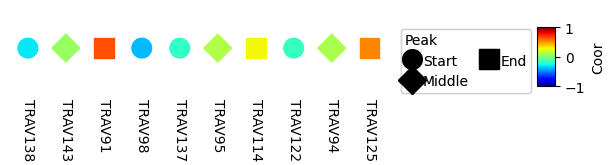

In [330]:
plt.figure(figsize=(5,1))
cm = pch.DotClustermapPlotter(leprSumDf,x='names',y='level_0',value='Coor',c='Coor',hue='Peak',s=1,
                               marker={'Start':'o','Middle':'D','End':'s'},ratio=200,
                              col_cluster=False,row_cluster=False,vmax=1,vmin=-1,
                             show_rownames=False,show_colnames=True)
plt.savefig("../result/24.1.31_fig5_trajmap_plot/leprSumDotplot.pdf")
plt.show()

In [195]:
PeakSelectLepr=peakDf.loc[geneList,selectSampleName]

In [335]:
travScore

TRAV1     TRAV2   
Bmsc2019_Regev_b3_sep_Chondro                      -2.030610 -1.767343  \
BmscEndosteal_Ono_Fgfr3CE_sep_Chondro              -1.823701 -1.354978   
BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro       -1.561985 -1.296873   
BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro        -1.525229 -1.445885   
BmscEndosteal_Ono_Gas1CE_sep_Chondro               -0.745045 -1.504838   
...                                                      ...       ...   
Metaphysis_Yang_4_sep_Fibroblast                    0.764659  0.366933   
Metaphysis_Yang_sorted_sep_Fibroblast               0.544285  0.956788   
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_... -0.433982 -0.237941   
Septoclasts_Kishor_Longbone2_sep_Fibroblast        -0.033197 -0.310841   
Septoclasts_Kishor_Pdgfra_sep_Fibroblast            0.985817  0.026425   

                                                       TRAV3     TRAV4   
Bmsc2019_Regev_b3_sep_Chondro                      -1.868706 -1.058582  \
BmscEndosteal_Ono_Fgfr3CE_sep_Chondro              -1.436777 -0.962681   
BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro       -1.381521 -0.318902   
BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro        -1.357668 -0.296989   
BmscEndosteal_Ono_Gas1CE_sep_Chondro               -1.685803  0.778851   
...                                                      ...       ...   
Metaphysis_Yang_4_sep_Fibroblast                    1.409362 -0.103597   
Metaphysis_Yang_sorted_sep_Fibroblast               0.879035  0.584419   
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_...  0.109321 -0.658246   
Septoclasts_Kishor_Longbone2_sep_Fibroblast         0.838894 -0.565566   
Septoclasts_Kishor_Pdgfra_sep_Fibroblast            2.061337 -0.162802   

                                                       TRAV5     TRAV6   
Bmsc2019_Regev_b3_sep_Chondro                      -1.797991 -1.921934  \
BmscEndosteal_Ono_Fgfr3CE_sep_Chondro              -1.545500 -1.772375   
BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro       -1.428406 -1.227802   
BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro        -1.054678 -0.875963   
BmscEndosteal_Ono_Gas1CE_sep_Chondro               -1.541432 -0.727895   
...                                                      ...       ...   
Metaphysis_Yang_4_sep_Fibroblast                    0.541148  0.424840   
Metaphysis_Yang_sorted_sep_Fibroblast               1.138355  0.915992   
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_...  0.421142 -0.611158   
Septoclasts_Kishor_Longbone2_sep_Fibroblast         0.710415 -0.689708   
Septoclasts_Kishor_Pdgfra_sep_Fibroblast            2.128390  0.732955   

                                                       TRAV7     TRAV8   
Bmsc2019_Regev_b3_sep_Chondro                      -1.889285 -1.973597  \
BmscEndosteal_Ono_Fgfr3CE_sep_Chondro              -2.112767 -0.820226   
BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro       -1.214212 -0.197400   
BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro        -1.181961  0.390524   
BmscEndosteal_Ono_Gas1CE_sep_Chondro               -0.709426 -0.552058   
...                                                      ...       ...   
Metaphysis_Yang_4_sep_Fibroblast                    0.247660  2.841069   
Metaphysis_Yang_sorted_sep_Fibroblast               0.569794  1.616029   
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_... -0.725114  0.778827   
Septoclasts_Kishor_Longbone2_sep_Fibroblast        -0.221626 -0.617975   
Septoclasts_Kishor_Pdgfra_sep_Fibroblast            1.289975  0.626521   

                                                       TRAV9    TRAV10  ...   
Bmsc2019_Regev_b3_sep_Chondro                      -1.588144 -1.813772  ...  \
BmscEndosteal_Ono_Fgfr3CE_sep_Chondro              -1.419047 -1.311589  ...   
BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro       -1.311922 -1.590174  ...   
BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro        -1.111729 -1.329713  ...   
BmscEndosteal_Ono_Gas1CE_sep_Chondro               -0.447484 -0.934362  ...   
...                      

In [336]:
travRaw=pd.DataFrame(trav.layers["raw"])
travRaw.index=travScore.index
travRaw.columns=travScore.columns

In [338]:
travRawBinary=travRaw>0.4

In [340]:
travColSum=travRawBinary.sum(axis=0)

In [344]:
travColSum=travColSum.sort_values(ascending=False)

In [345]:
travColSumDf=pd.DataFrame(travColSum)

In [346]:
travColSumDf.to_csv("../processed_data/12.12_TRAV/conservedtravColSumDf_trav.csv")

In [354]:
travColSumDf[0:20].index

Index(['TRAV208', 'TRAV194', 'TRAV77', 'TRAV79', 'TRAV6', 'TRAV92', 'TRAV125',
       'TRAV132', 'TRAV93', 'TRAV222'],
      dtype='object')

In [444]:
conservedTRAV=travColSumDf.index[travColSumDf[0]>43]

In [424]:
travColSumDf[0:20]

0
TRAV208  87
TRAV194  86
TRAV77   83
TRAV79   80
TRAV6    72
TRAV92   72
TRAV125  70
TRAV132  61
TRAV93   61
TRAV222  61
TRAV91   59
TRAV140  56
TRAV127  50
TRAV7    49
TRAV76   46
TRAV84   46
TRAV116  46
TRAV139  45
TRAV195  44
TRAV122  42

In [433]:
trav.X=trav.layers["raw"]

In [441]:
trav.var_names="T"+trav.var_names

In [453]:
trav.var_names

Index(['TRAV1', 'TRAV2', 'TRAV3', 'TRAV4', 'TRAV5', 'TRAV6', 'TRAV7', 'TRAV8',
       'TRAV9', 'TRAV10',
       ...
       'TRAV217', 'TRAV218', 'TRAV219', 'TRAV220', 'TRAV221', 'TRAV222',
       'TRAV223', 'TRAV224', 'TRAV225', 'TRAV226'],
      dtype='object', length=226)

In [484]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 35})

In [479]:
trav.obsm["TRAVMap_umap"]=trav.obsm["TrajMap_umap"]

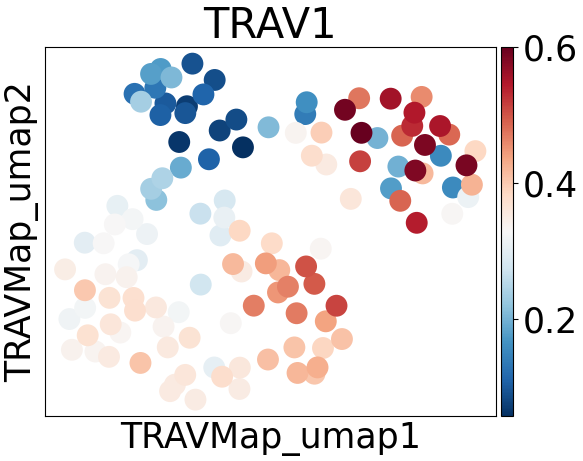

In [481]:
sc.pl.embedding(trav,color="TRAV1",basis="TRAVMap_umap",cmap="RdBu_r",vmax=0.6,save="osteogensis_conserved")

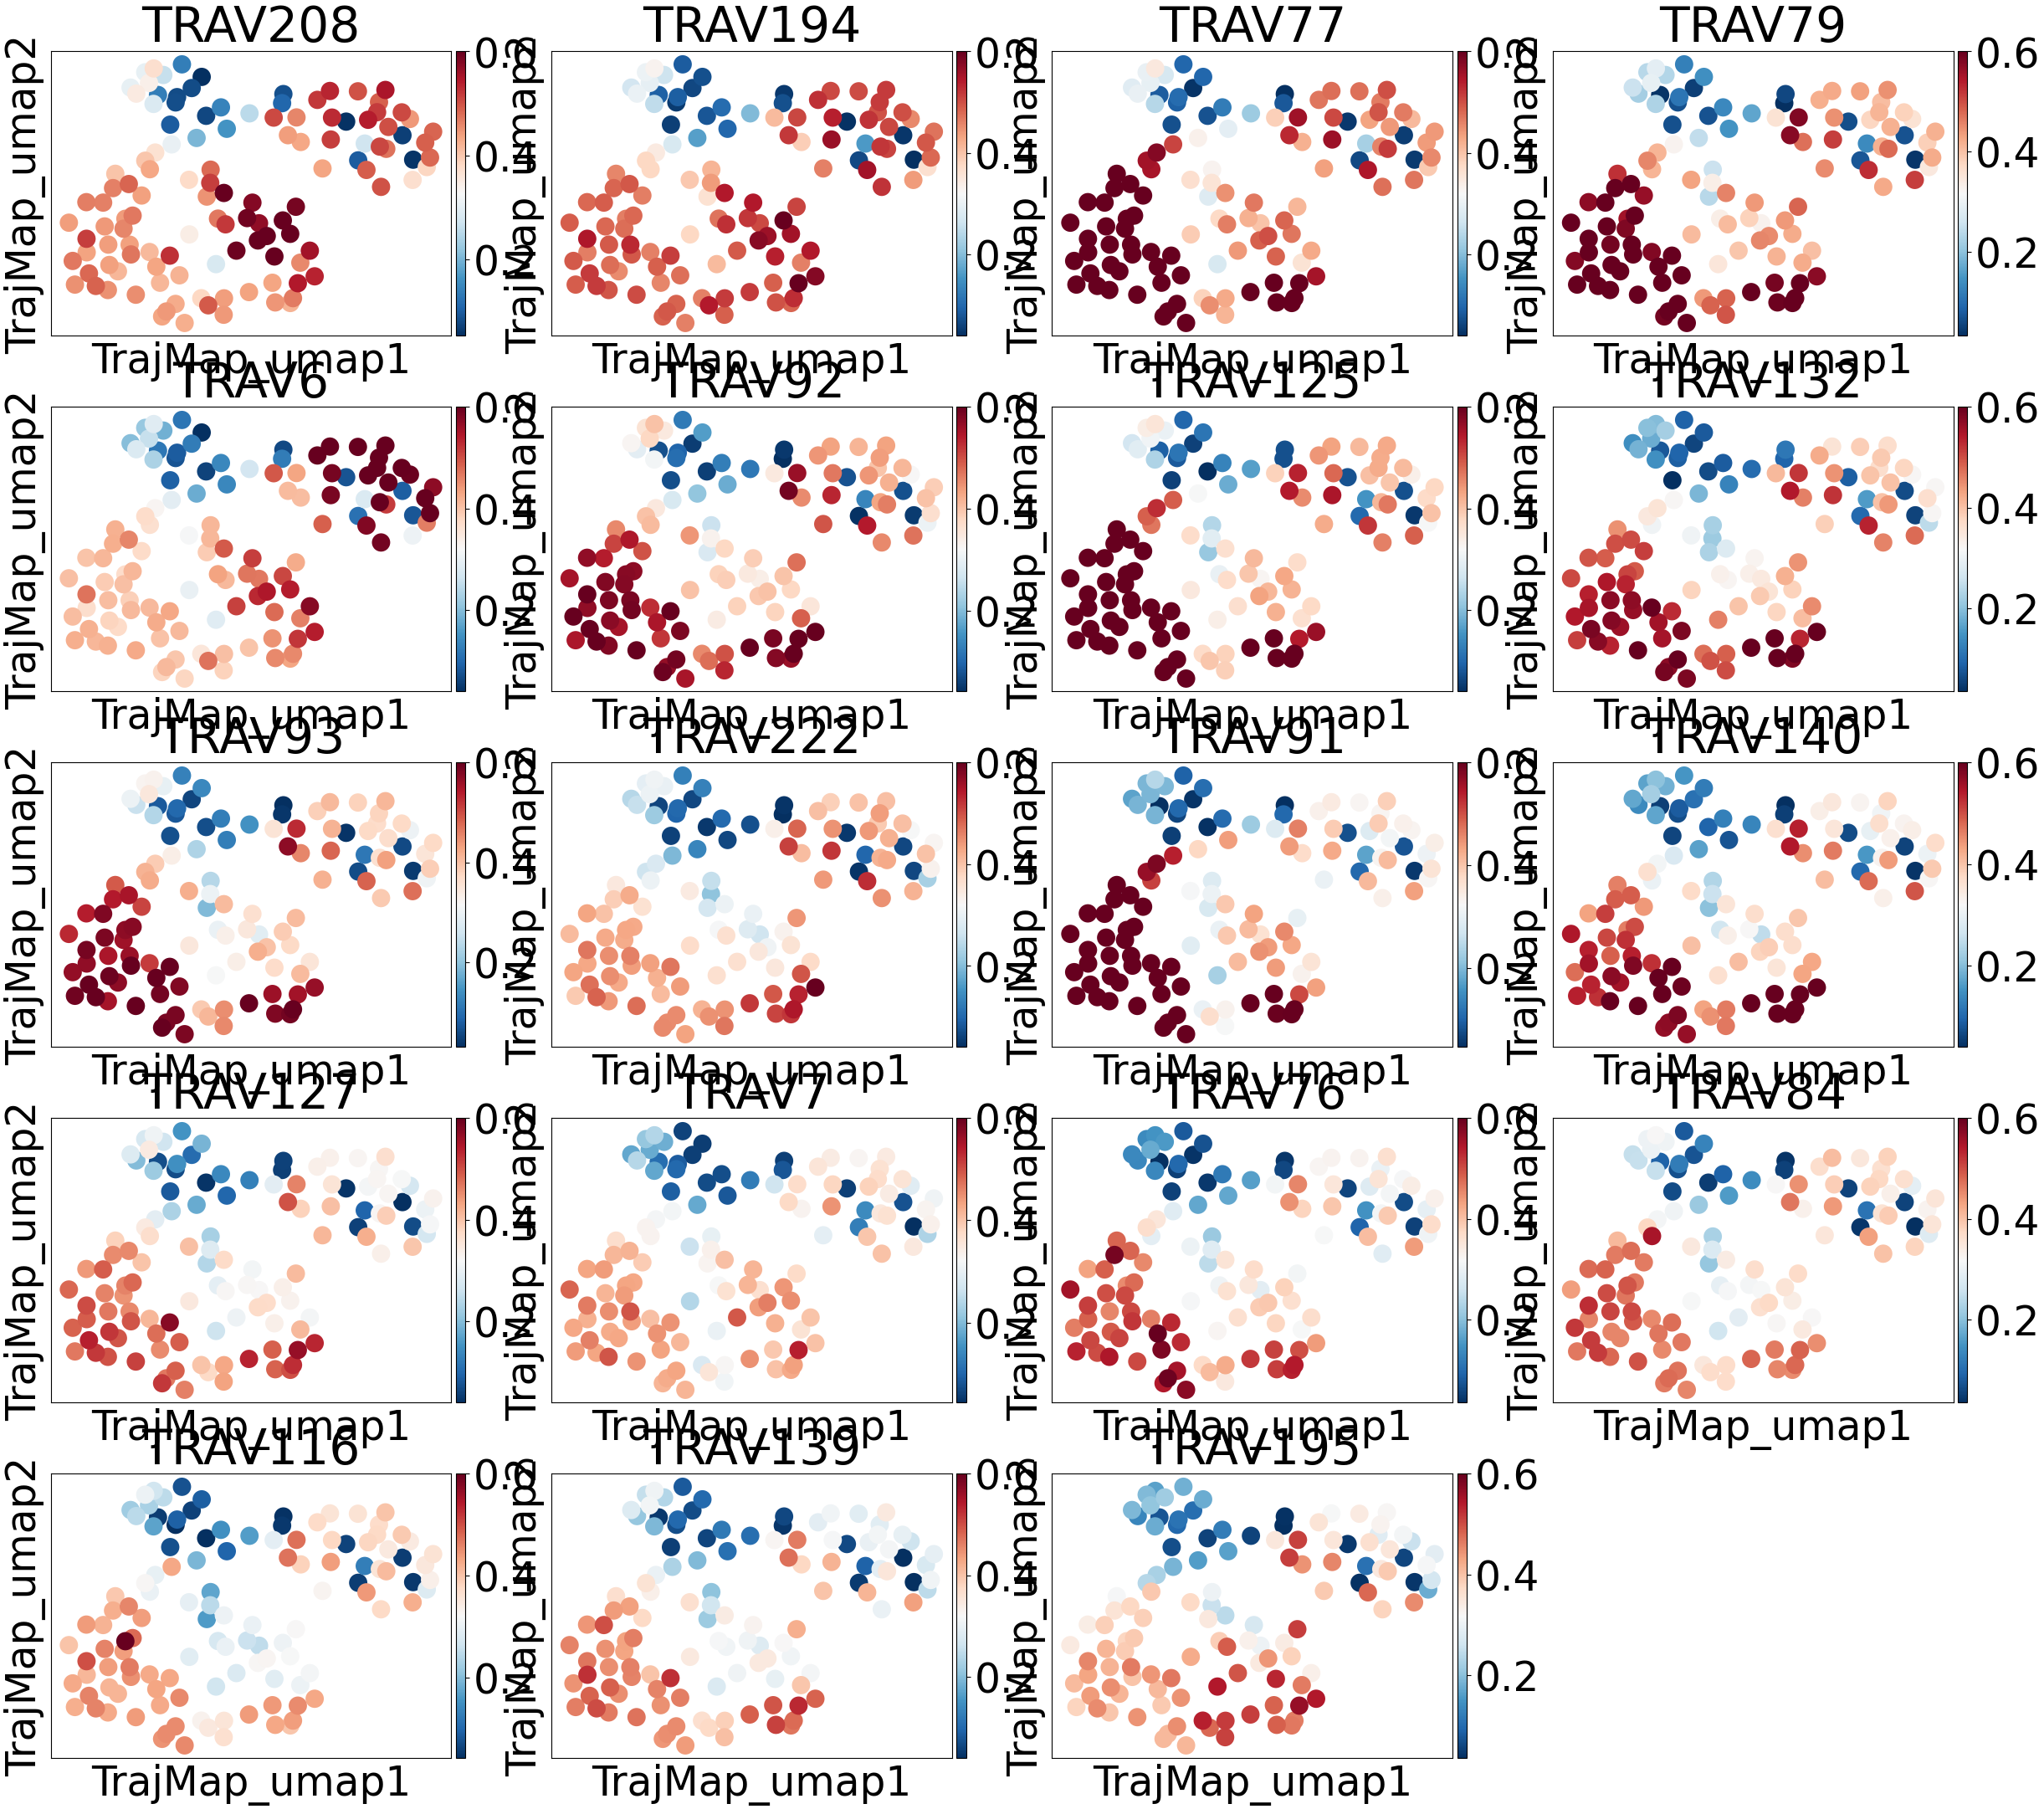

In [485]:
sc.pl.embedding(trav,color=conservedTRAV,basis="TrajMap_umap",cmap="RdBu_r",vmax=0.6,save="osteogensis_conserved")

In [463]:
leprSpecific="T"+leprSpecific

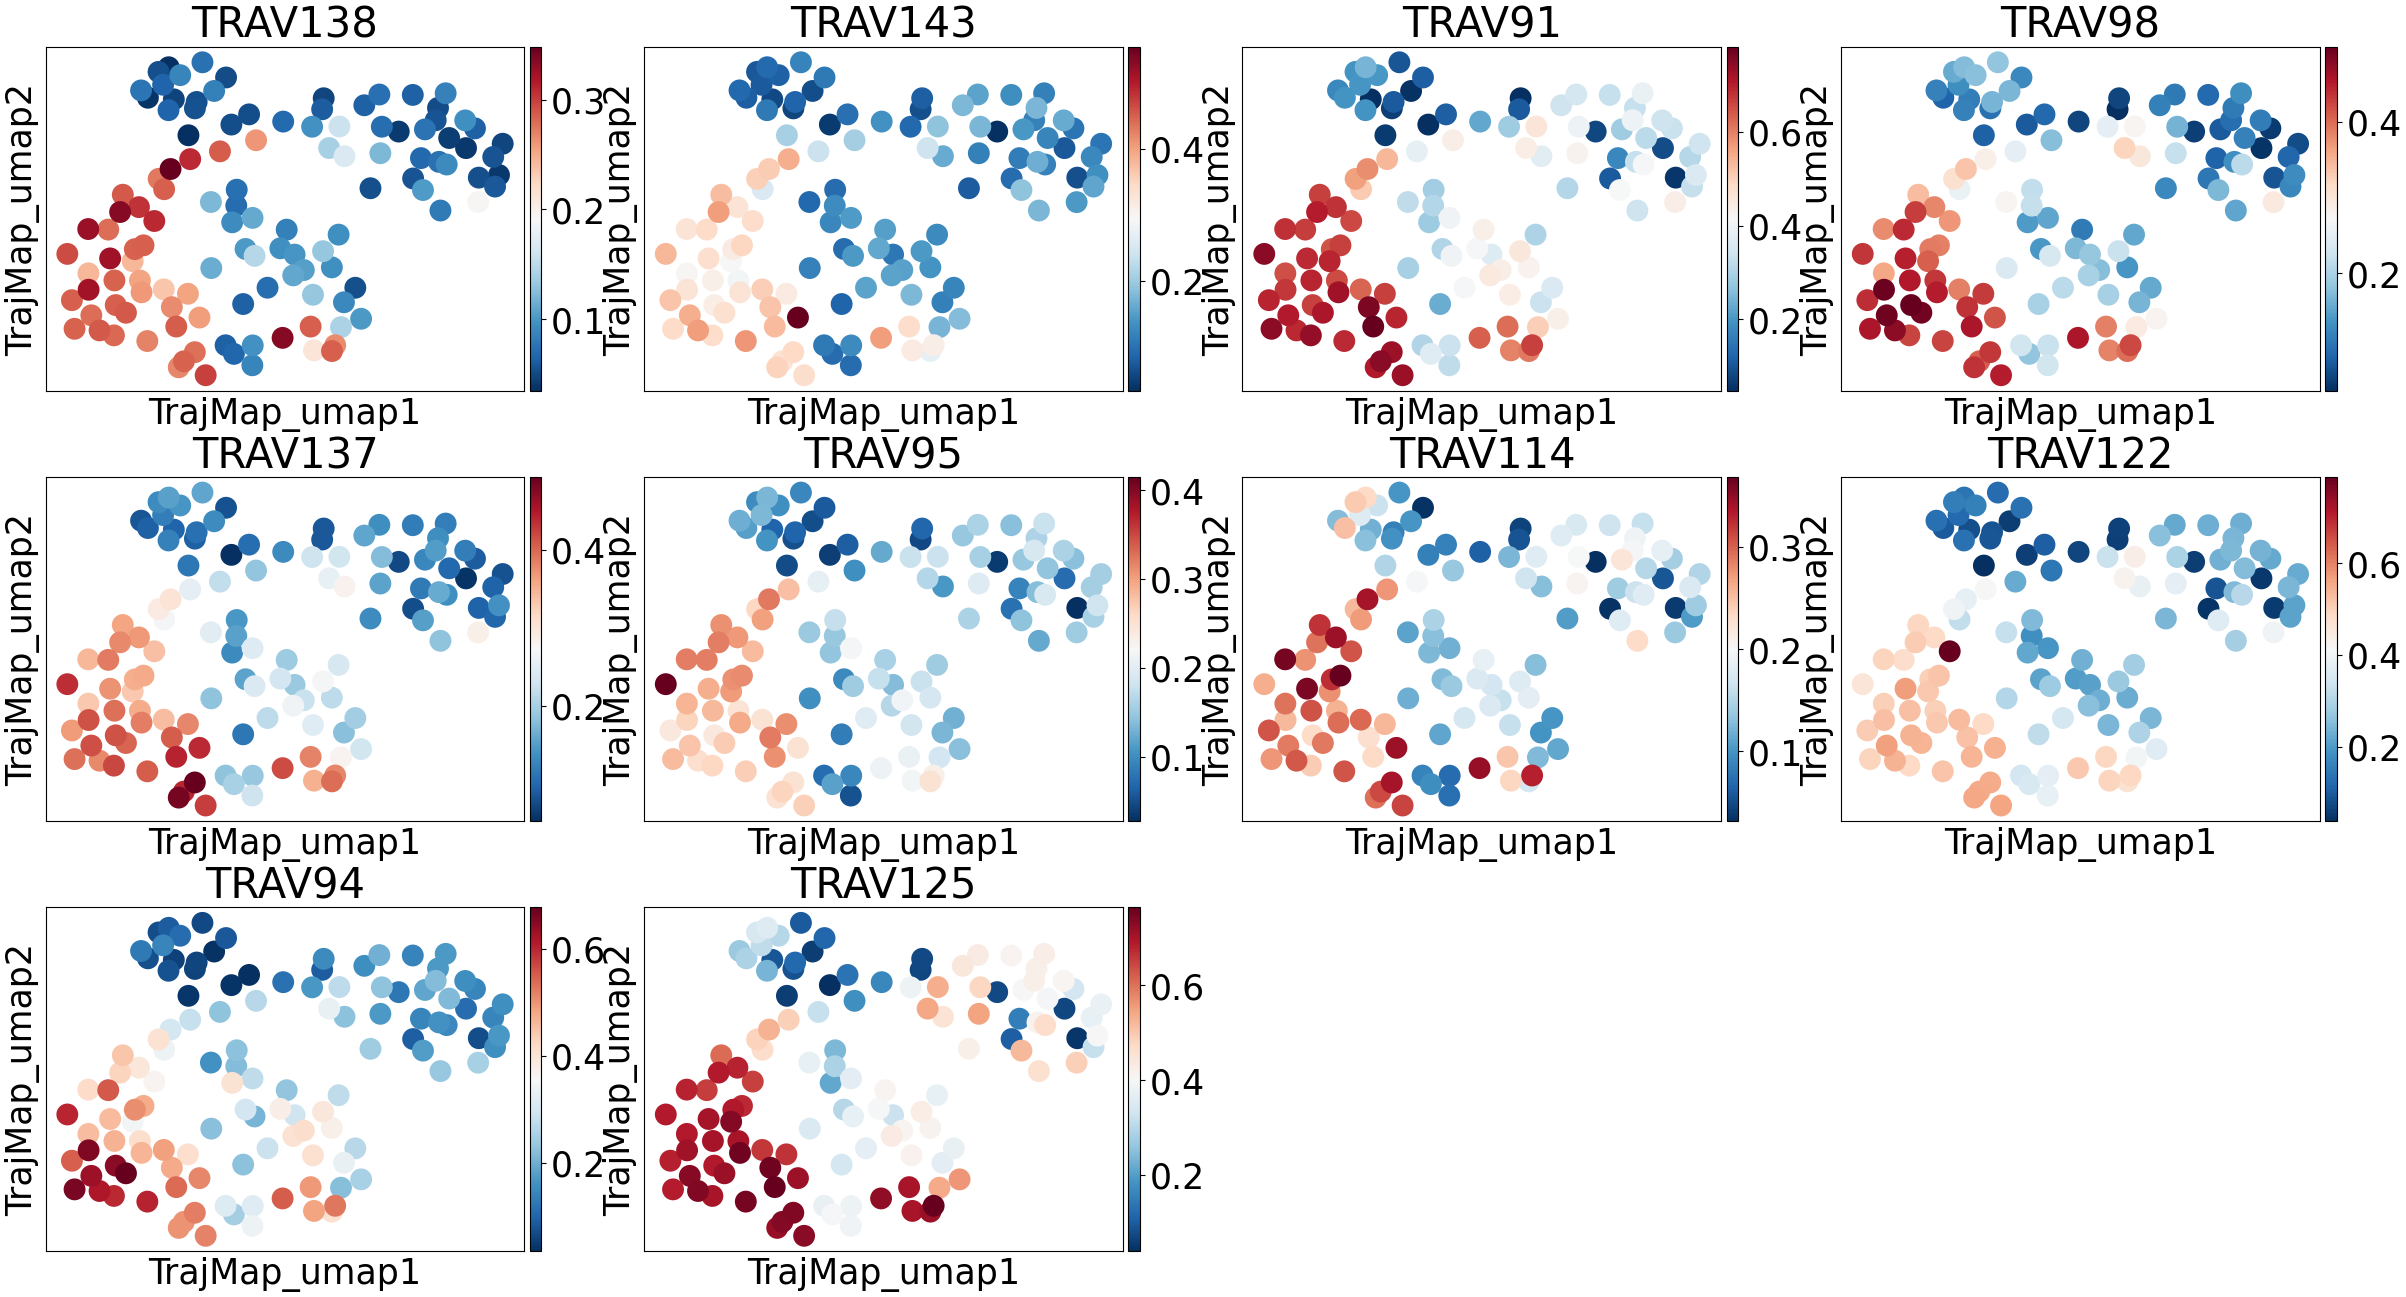

In [483]:
sc.pl.embedding(trav,color=leprSpecific,basis="TrajMap_umap",cmap="RdBu_r",save="lepr_specific")

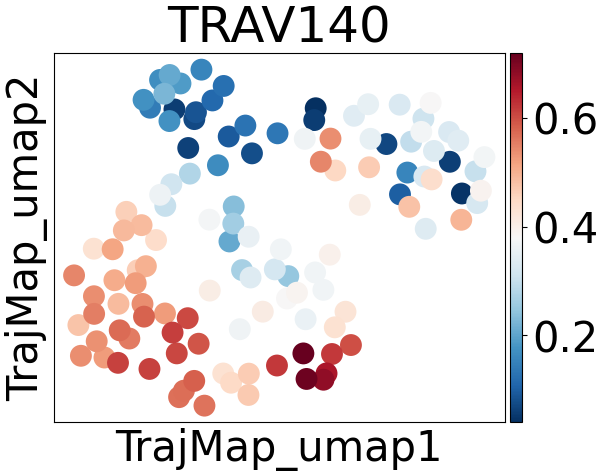

In [919]:
sc.pl.embedding(trav,color="TRAV140",basis="TrajMap_umap",cmap="RdBu_r",save="TRAV140")

In [ ]:
sc.pl.embedding(trav,color=conservedTRAV,basis="TrajMap_umap",cmap="RdBu_r",vmax=0.6,save="osteogensis_conserved")

In [367]:
# Extract the column
geneList = travModel.loc[:, "TRAV77"]
geneList = geneList.sort_values(ascending=False)
geneList=geneList.index[0:20]

conservedDf=makeLong(geneList,combined_list)

In [368]:
conservedDf

level_0                                        level_1      Coor   
0      Sox6             Bmsc2019_Regev_samp1_sep_Lepr_BMSC  0.567746  \
1      Sox6              BmscTime_Zhong_1.5M_sep_Lepr_BMSC  0.624056   
2      Sox6                BmscTime_Zhong_1M_sep_Lepr_BMSC  0.623563   
3      Sox6               Bmsc2019_Regev_bm2_sep_Lepr_BMSC  0.528886   
4      Sox6  BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Lepr_BMSC  0.566598   
..      ...                                            ...       ...   
395    Nrp2       Ablation_Matsushita_cxcl2_sep_Fibroblast  0.852138   
396    Nrp2             BmscTime_Zhong_1.5M_sep_Fibroblast  0.884824   
397    Nrp2       Ablation_Matsushita_abl14_sep_Fibroblast  0.852802   
398    Nrp2   BmscEndosteal_Ono_Prrx1cre18M_sep_Fibroblast  0.870350   
399    Nrp2               Bmsc2019_Regev_b2_sep_Fibroblast  0.862366   

         Expr    Peak  
0    0.109444     End  
1    0.170286     End  
2    0.161061     End  
3    0.116629  Middle  
4    0.158451     End  
..        ...     ...  
395  0.878312     End  
396  0.848808     End  
397  0.863686     End  
398  0.956643     End  
399  0.614222     End  

[400 rows x 5 columns]

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 12.172222222222222 mm


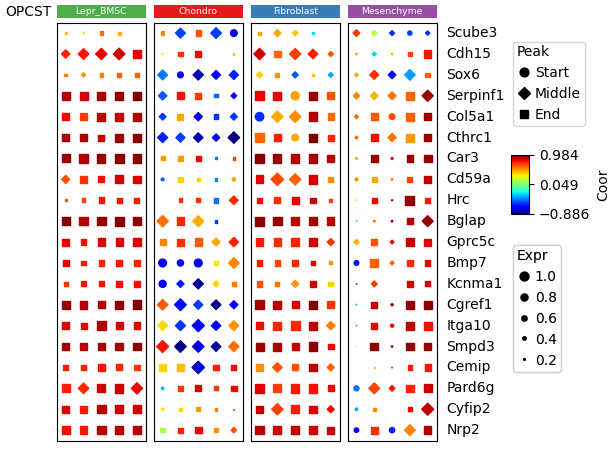

In [369]:
plt.figure(figsize=(5,5))
cm = pch.DotClustermapPlotter(conservedDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s="Expr",
                               marker={'Start':'o','Middle':'D','End':'s'},row_dendrogram=False,
                              col_split_gap=2, col_split=sampleAnnpo,ratio=40,
                              top_annotation=col_ha,col_split_order=colSplitOrder,col_cluster=True,row_cluster=True,
                              show_rownames=True,show_colnames=False,spines=True)
plt.savefig("../result/24.1.31_fig5_trajmap_plot/conserved_dotplot.pdf")
plt.show()

In [398]:
travColSumDf.iloc[[i-1 for i in [1,3,5,7,8,12,15,16,17,19]] ]

0
TRAV208  87
TRAV77   83
TRAV6    72
TRAV125  70
TRAV132  61
TRAV140  56
TRAV76   46
TRAV84   46
TRAV116  46
TRAV195  44

In [397]:
[i-1 for i in [1,3,5,7,8,12,15,16,17,19]] 

[0, 2, 4, 6, 7, 11, 14, 15, 16, 18]

In [396]:
for i in [1,3,5,7,8,12,15,16,17,19]
[1,3,5,7,8,12,15,16,17,19]-1

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [399]:
peakList=[]
coorList=[]
exprList=[]
RAVselect=travColSumDf.iloc[[i-1 for i in [1,3,5,7,8,12,15,16,17,19]] ].index
for i in RAVselect:
    RAVsample=i
    # Extract the column
    geneSelectTop20 = travModel.loc[:, RAVsample]
    geneSelectTop20 = geneSelectTop20.sort_values(ascending=False)
    geneSelectTop20=geneSelectTop20.index[0:20]
    CoorSelectLepr=coorDf_scale.loc[geneSelectTop20,selectSampleName]
    PeakSelectLepr=peakDf.loc[geneSelectTop20,selectSampleName]
    PeakSelectLepr=PeakSelectLepr.applymap(lambda x:'End' if x>=7 else 'Middle' if x >= 3 else 'Start')
    PeakSelectLeprLong=pd.melt(PeakSelectLepr, value_vars=PeakSelectLepr.columns)
    ExprSelectLepr=scaled_df2.loc[geneSelectTop20,selectSampleName]
    peakMean=PeakSelectLeprLong.iloc[:,1].mode()
    coorMean=np.mean(CoorSelectLepr)
    exprMean=np.mean(ExprSelectLepr)
    peakList.append(peakMean)
    coorList.append(coorMean)
    exprList.append(exprMean)

coorDfLepr=pd.DataFrame(coorList).T
coorDfLepr.columns=RAVselect
coorDfLepr.index=["Score"]
peakDfLepr=pd.DataFrame(peakList).T
peakDfLepr.columns=RAVselect
peakDfLepr.index=["Score"]
exprDfLepr=pd.DataFrame(exprList).T
exprDfLepr.columns=RAVselect
exprDfLepr.index=["Score"]

conservedSumDf=makeLongSum()

In [392]:
conservedSumDf

level_0  level_1      Coor      Expr   Peak
0   Score  TRAV194  0.772483  0.487384    End
1   Score   TRAV79  0.804495  0.530709    End
2   Score   TRAV92  0.829967  0.579012    End
3   Score  TRAV132 -0.383368  0.286075  Start
4   Score   TRAV93  0.605130  0.404071    End
5   Score  TRAV127  0.671650  0.426757    End
6   Score   TRAV84  0.536208  0.331519    End
7   Score  TRAV116  0.599486  0.378775    End
8   Score  TRAV139  0.483043  0.317879    End
9   Score  TRAV122 -0.170239  0.248981  Start

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 12.172222222222222 mm
Incresing ncol


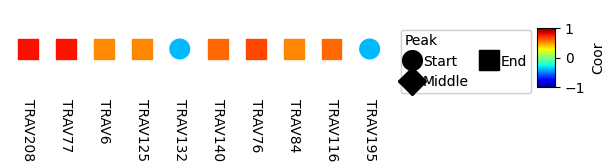

In [400]:
plt.figure(figsize=(5,1))
conservedSumDf["level_1"]=pd.Categorical(conservedSumDf["level_1"],categories=RAVselect)
cm = pch.DotClustermapPlotter(conservedSumDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s=1,
                               marker={'Start':'o','Middle':'D','End':'s'},ratio=200,
                              col_cluster=False,row_cluster=False,vmax=1,vmin=-1,
                             show_rownames=False,show_colnames=True)
plt.savefig("../result/24.1.31_fig5_trajmap_plot/conserveSumDotplot.pdf")
plt.show()

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 12.172222222222222 mm
Incresing ncol


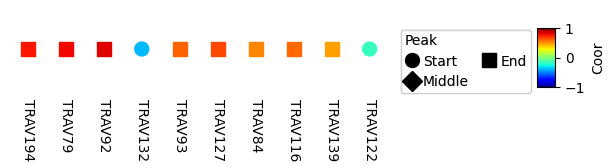

In [394]:
plt.figure(figsize=(5,1))
conservedSumDf["level_1"]=pd.Categorical(conservedSumDf["level_1"],categories=RAVselect)
cm = pch.DotClustermapPlotter(conservedSumDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s=1,
                               marker={'Start':'o','Middle':'D','End':'s'},ratio=100,
                              col_cluster=False,row_cluster=False,vmax=1,vmin=-1,
                             show_rownames=False,show_colnames=True)
plt.savefig("../result/24.1.31_fig5_trajmap_plot/conserveSumDotplot2.pdf")
plt.show()

In [191]:
np.mean(leprSelect)

0.03846277495715455

In [41]:
meta=pd.read_csv("../../important_processed_data/10.26_wt_integrate_meta.csv",index_col=0)
sampleDf2=meta[["Sample","Project"]][meta["Sample"].isin(coorDf.columns)].drop_duplicates()
sampleDf2.index=sampleDf2["Sample"]

/tmp/ipykernel_893794/563224984.py:1: DtypeWarning: Columns (12,17,18,19,21,22,23,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  meta=pd.read_csv("../../important_processed_data/10.26_wt_integrate_meta.csv",index_col=0)


In [95]:
for value, indices in selected_samples.items():
    samples = [lineageAnno[index] for index in indices]

In [98]:
combined_list = [value for values in selected_samples.values() for value in values]


In [381]:
trav.layers["scale"]=trav.X

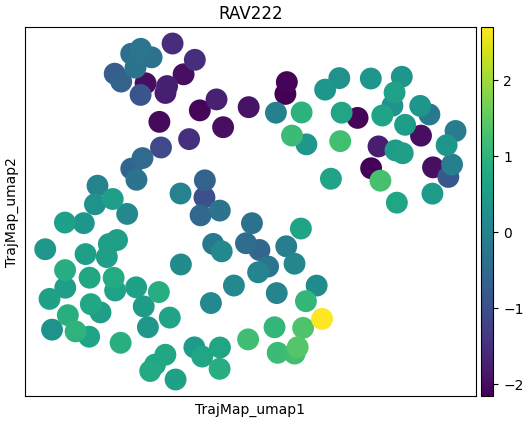

In [379]:
sc.pl.embedding(trav,color="RAV222",basis="TrajMap_umap")

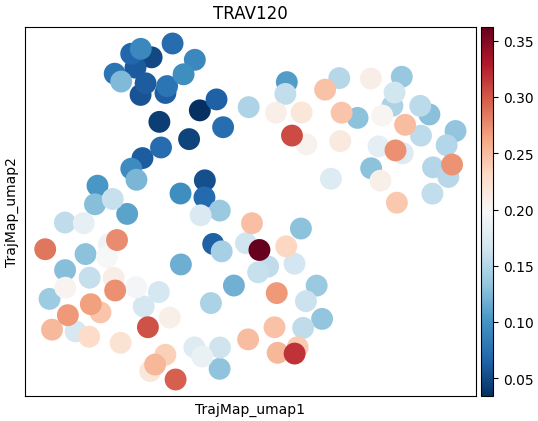

In [791]:
sc.pl.embedding(trav,color="TRAV120",basis="TrajMap_umap",cmap="RdBu_r")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


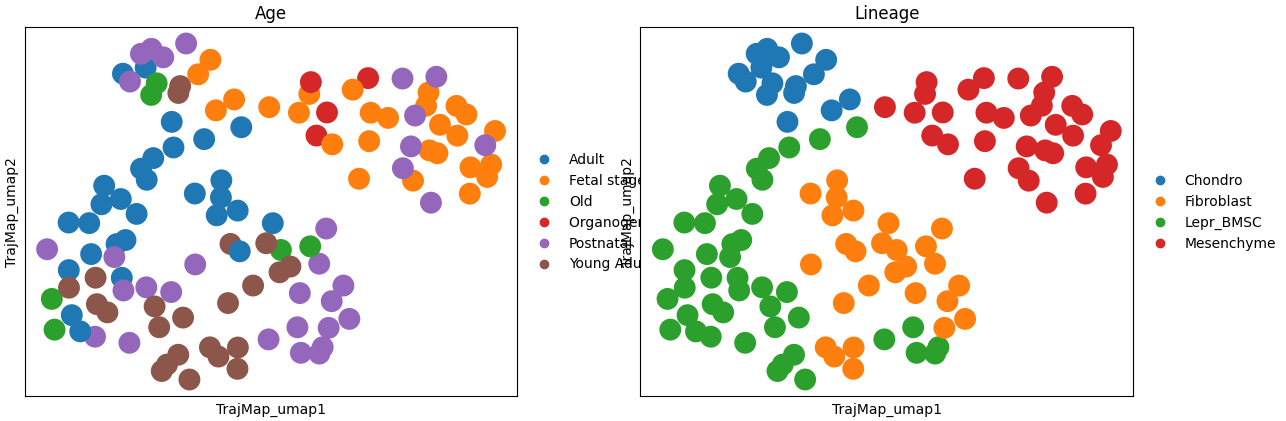

In [828]:
sc.pl.embedding(trav,color=["Age","Lineage"],basis="TrajMap_umap")

In [792]:
trav.obs["Age_OPC"]=trav.obs["Lineage"].astype(str) + "_" + trav.obs["Age"].astype(str) 

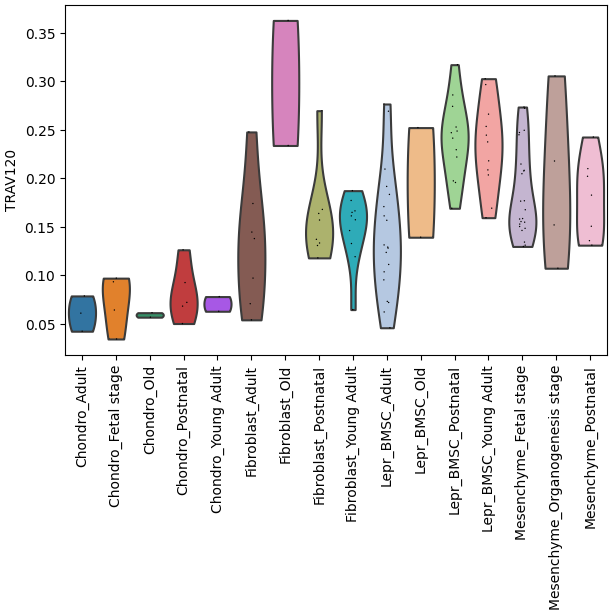

In [794]:
sc.pl.violin(trav,"TRAV120",groupby="Age_OPC",rotation=90)

In [860]:
travAxis=np.array(trav[:,"TRAV140"].X)
trav.obs["TRAV120_Lepr"]=travAxis
trav.obs["TRAV120_Lepr"][trav.obs["Lineage"]!="Lepr_BMSC"]=np.nan
trav.obs["TRAV120_Fibroblast"]=travAxis
trav.obs["TRAV120_Fibroblast"][trav.obs["Lineage"]!="Fibroblast"]=np.nan
trav.obs["TRAV120_MSC"]=travAxis
trav.obs["TRAV120_MSC"][trav.obs["Lineage"]!="Mesenchyme"]=np.nan
trav.obs["TRAV120_Chondrocyte"]=travAxis
trav.obs["TRAV120_Chondrocyte"][trav.obs["Lineage"]!="Chondro"]=np.nan

/tmp/ipykernel_893794/3971571646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trav.obs["TRAV120_Lepr"][trav.obs["Lineage"]!="Lepr_BMSC"]=np.nan
/tmp/ipykernel_893794/3971571646.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trav.obs["TRAV120_Fibroblast"][trav.obs["Lineage"]!="Fibroblast"]=np.nan
/tmp/ipykernel_893794/3971571646.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trav.obs["TRAV120_MSC"][trav.obs["Lineage"]!=

In [857]:
trav.obs['Age']=trav.obs['Age'].cat.reorder_categories(['Organogenesis stage', 'Fetal stage','Postnatal', 'Young Adult','Adult',"Old"])

In [876]:
trav

AnnData object with n_obs × n_vars = 121 × 226
    obs: 'Organ', 'Stage', 'Age', 'Tissue', 'Tissue.Specific.', 'Gene.type', 'Treatment', 'Age.In.Detail.', 'Machine', 'Origin', 'Sample', 'Lineage', 'coor:mod_weight', 'expr:mod_weight', 'peak:mod_weight', 'TRAV:mod_weight', 'Age_OPC', 'TRAV120_Young', 'TRAV120_Lepr', 'TRAV120_Fibroblast', 'TRAV120_MSC', 'TRAV120_Chondrocyte'
    var: 'mean', 'std'
    uns: 'Age_OPC_colors', 'Age_colors', 'Lineage_colors', 'neighbors', 'pca', 'umap', 'rank_genes_groups'
    obsm: 'TrajMap_umap', 'X_pca', 'X_umap', 'TRAVMap_umap'
    varm: 'PCs'
    layers: 'raw', 'scale'
    obsp: 'connectivities', 'distances'

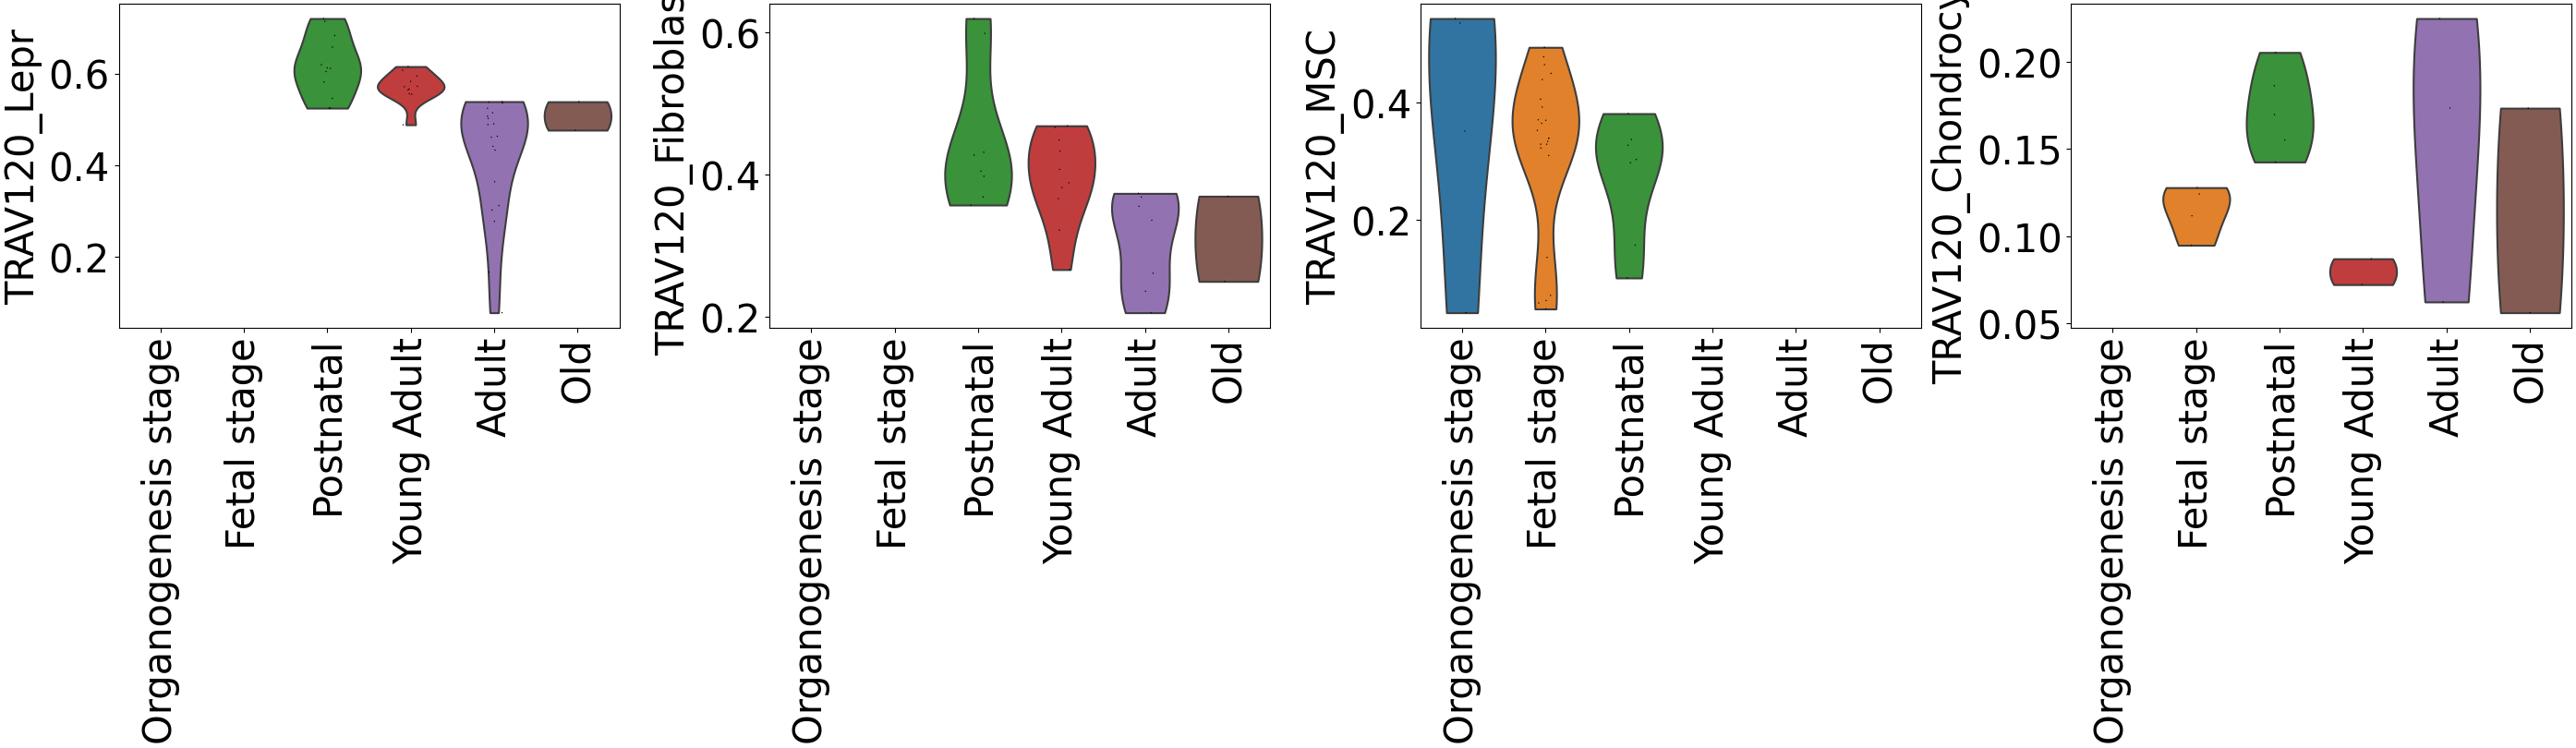

In [918]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})
sc.pl.violin(trav,["TRAV120_Lepr","TRAV120_Fibroblast","TRAV120_MSC","TRAV120_Chondrocyte"],groupby="Age",rotation=90,save="age_violin")

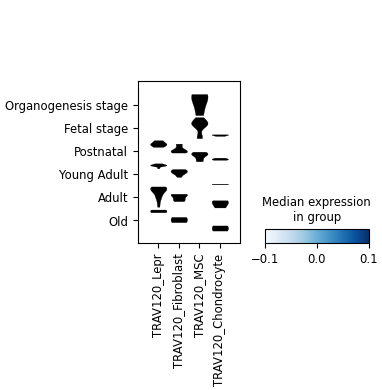

AttributeError: 'NoneType' object has no attribute 'add_totals'

In [890]:

sc.pl.stacked_violin(trav,["TRAV120_Lepr","TRAV120_Fibroblast","TRAV120_MSC","TRAV120_Chondrocyte"],groupby="Age").add_totals().show()


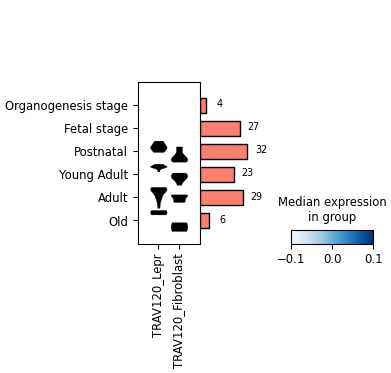

In [905]:

plot=sc.pl.stacked_violin(trav,["TRAV120_Lepr","TRAV120_Fibroblast"],,groupby="Age", return_fig=True,rotation=90,vmax=0.6)
plot.add_totals().show()

In [921]:
mesIndex = np.where(trajMap.obs["Lineage"] == "Mesenchyme")[0]

In [923]:
# Extract the column
geneList = travModel.loc[:, "TRAV140"]
geneList = geneList.sort_values(ascending=False)
geneList=geneList.index[0:20]

ageDf=makeLong(geneList,mesIndex)

In [924]:
ageAnno=trajMap.obs["Age"]

In [925]:
sampleAnnpo=ageAnno[mesIndex]

In [926]:
col_ha = pch.HeatmapAnnotation(Age=pch.anno_simple(sampleAnnpo,cmap='Set1',legend=False,add_text=True),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

In [927]:
NMFScore=pd.DataFrame(range(20))
NMFScore.index=geneList

In [928]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

In [929]:
row_ha = pch.HeatmapAnnotation(NMFscore=pch.anno_simple(NMFScore,cmap='Reds'),legend=False,add_text=False,
                              axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left'})

In [930]:
colSplitOrder=[  'Postnatal' , 'Young Adult' , 'Adult' , 'Old']

In [931]:
sampleAnnpo=sampleAnnpo.astype("str")

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 12.172222222222222 mm


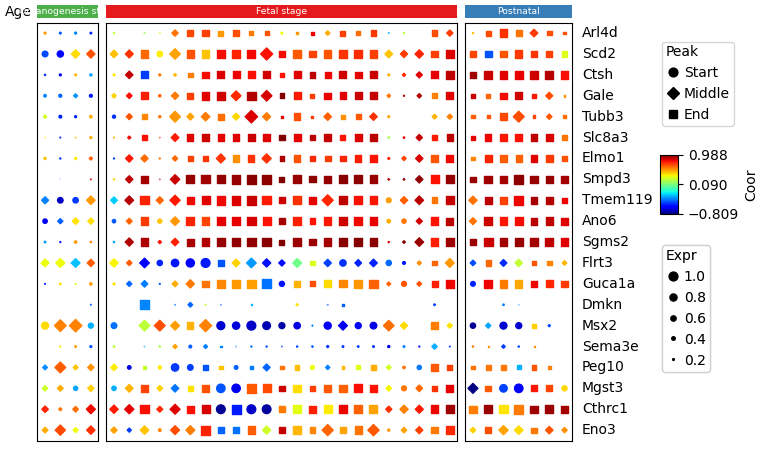

In [932]:
plt.figure(figsize=(7,5))
cm = pch.DotClustermapPlotter(ageDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s="Expr",
                               marker={'Start':'o','Middle':'D','End':'s'},row_dendrogram=False,
                              col_split_gap=2, col_split=sampleAnnpo,ratio=40,
                              top_annotation=col_ha,col_cluster=True,row_cluster=True,
                              show_rownames=True,show_colnames=False,spines=True)
plt.savefig("../result/24.2.22_fig5_supp/age_mes_trav140.pdf")
plt.show()

In [933]:
trajMap.obs["Lineage"]

Bmsc2019_Regev_b3_sep_Chondro                                       Chondro
BmscEndosteal_Ono_Fgfr3CE_sep_Chondro                               Chondro
BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro                        Chondro
BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro                         Chondro
BmscEndosteal_Ono_Gas1CE_sep_Chondro                                Chondro
                                                                    ...    
Metaphysis_Yang_4_sep_Fibroblast                                 Fibroblast
Metaphysis_Yang_sorted_sep_Fibroblast                            Fibroblast
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_sep_Fibroblast    Fibroblast
Septoclasts_Kishor_Longbone2_sep_Fibroblast                      Fibroblast
Septoclasts_Kishor_Pdgfra_sep_Fibroblast                         Fibroblast
Name: Lineage, Length: 121, dtype: category
Categories (4, object): ['Chondro', 'Fibroblast', 'Lepr_BMSC', 'Mesenchyme']

In [934]:
leprIndex = np.where(trajMap.obs["Lineage"] == "Lepr_BMSC")[0]

In [940]:
# Extract the column
geneList = travModel.loc[:, "TRAV140"]
geneList = geneList.sort_values(ascending=False)
geneList=geneList.index[0:20]

ageDf=makeLong(geneList,leprIndex)

In [941]:
ageAnno=trajMap.obs["Age"]

In [942]:
sampleAnnpo=ageAnno[leprIndex]

In [943]:
col_ha = pch.HeatmapAnnotation(Age=pch.anno_simple(sampleAnnpo,cmap='Set1',legend=False,add_text=True),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

In [944]:
row_ha = pch.HeatmapAnnotation(NMFscore=pch.anno_simple(NMFScore,cmap='Reds'),legend=False,add_text=False,
                              axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left'})

In [945]:
sampleAnnpo=sampleAnnpo.astype("str")

In [946]:
ageAnno

Bmsc2019_Regev_b3_sep_Chondro                                          Adult
BmscEndosteal_Ono_Fgfr3CE_sep_Chondro                              Postnatal
BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro                           Adult
BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro                            Adult
BmscEndosteal_Ono_Gas1CE_sep_Chondro                               Postnatal
                                                                    ...     
Metaphysis_Yang_4_sep_Fibroblast                                   Postnatal
Metaphysis_Yang_sorted_sep_Fibroblast                              Postnatal
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_sep_Fibroblast      Postnatal
Septoclasts_Kishor_Longbone2_sep_Fibroblast                      Young Adult
Septoclasts_Kishor_Pdgfra_sep_Fibroblast                         Young Adult
Name: Age, Length: 121, dtype: category
Categories (6, object): ['Organogenesis stage' < 'Fetal stage' < 'Postnatal' < 'Young Adult' < 'Adult' < 'Old']

In [947]:
ageDf

level_0                                            level_1      Coor   
0      Dmkn            Ablation_Matsushita_abl14_sep_Lepr_BMSC -0.506710  \
1      Dmkn         Ablation_Matsushita_abl7con1_sep_Lepr_BMSC  0.284416   
2      Dmkn         Ablation_Matsushita_abl7con2_sep_Lepr_BMSC  0.000000   
3      Dmkn            Ablation_Matsushita_cxcl1_sep_Lepr_BMSC -0.274070   
4      Dmkn            Ablation_Matsushita_cxcl2_sep_Lepr_BMSC -0.279711   
..      ...                                                ...       ...   
875  Cthrc1  PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21...  0.943594   
876  Cthrc1  PerichondrialP21_Matsushita_HesCreCxcl12GfpP21...  0.880760   
877  Cthrc1         Septoclasts_Kishor_Longbone1_sep_Lepr_BMSC  0.983696   
878  Cthrc1         Septoclasts_Kishor_Longbone2_sep_Lepr_BMSC  0.982917   
879  Cthrc1            Septoclasts_Kishor_Pdgfra_sep_Lepr_BMSC  0.973377   

         Expr    Peak  
0    0.016843   Start  
1    0.047407  Middle  
2    0.000000   Start  
3    0.001906   Start  
4    0.006031   Start  
..        ...     ...  
875  0.833067     End  
876  0.760449     End  
877  0.878884     End  
878  0.865735     End  
879  0.878888     End  

[880 rows x 5 columns]

In [948]:
colSplitOrder=[  'Postnatal' , 'Young Adult' , 'Adult' , 'Old']

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 12.172222222222222 mm


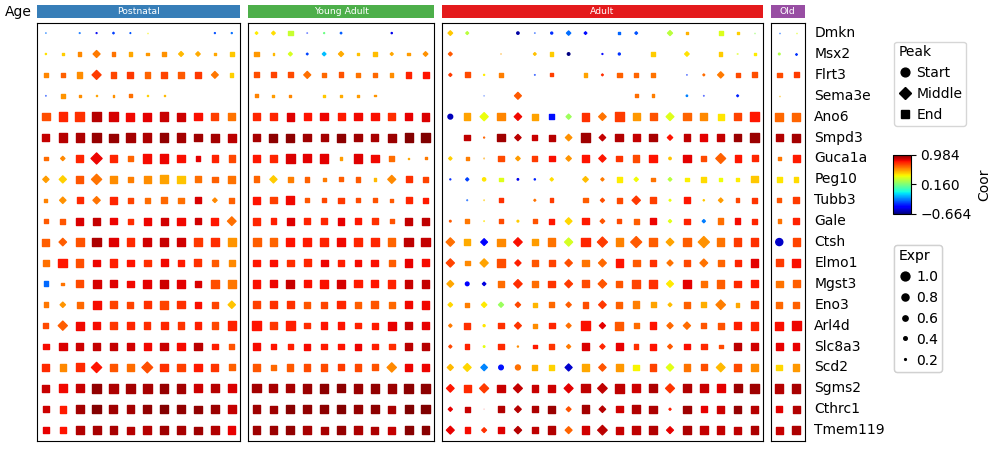

In [949]:
plt.figure(figsize=(10,5))
cm = pch.DotClustermapPlotter(ageDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s="Expr",
                               marker={'Start':'o','Middle':'D','End':'s'},row_dendrogram=False,
                              col_split_gap=2, col_split=sampleAnnpo,ratio=40,
                              top_annotation=col_ha,col_cluster=True,row_cluster=True,col_split_order=colSplitOrder,
                              show_rownames=True,show_colnames=False,spines=True)
plt.savefig("../result/24.2.22_fig5_supp/age_lepr_trav140.pdf")
plt.show()

In [950]:
# Extract the column
geneList = travModel.loc[:, "TRAV140"]
geneList = geneList.sort_values(ascending=False)
geneList=geneList.index[0:20]

ageDf=makeLong(geneList,leprIndex)
peakList=[]
coorList=[]
exprList=[]
for i in colSplitOrder:
    selectSampleName=ageAnno[ageAnno==i].index
    CoorSelectLepr=coorDf_scale.loc[geneList,selectSampleName]
    PeakSelectLepr=peakDf.loc[geneList,selectSampleName]
    PeakSelectLepr=PeakSelectLepr.applymap(lambda x:'End' if x>=7 else 'Middle' if x >= 3 else 'Start')
    PeakSelectLeprLong=pd.melt(PeakSelectLepr, value_vars=PeakSelectLepr.columns)
    ExprSelectLepr=scaled_df2.loc[geneList,selectSampleName]
    peakMean=PeakSelectLeprLong.iloc[:,1].mode()
    coorMean=np.mean(CoorSelectLepr)
    exprMean=np.mean(ExprSelectLepr)
    peakList.append(peakMean)
    coorList.append(coorMean)
    exprList.append(exprMean)

coorDfLepr=pd.DataFrame(coorList).T
coorDfLepr.columns=colSplitOrder
coorDfLepr.index=["Score"]
peakDfLepr=pd.DataFrame(peakList).T
peakDfLepr.columns=colSplitOrder
peakDfLepr.index=["Score"]
exprDfLepr=pd.DataFrame(exprList).T
exprDfLepr.columns=colSplitOrder
exprDfLepr.index=["Score"]

conservedSumDf=makeLongSum()

In [951]:
conservedSumDf

level_0      level_1      Coor      Expr Peak
0   Score    Postnatal  0.505863  0.515204  End
1   Score  Young Adult  0.578606  0.521660  End
2   Score        Adult  0.426766  0.352646  End
3   Score          Old  0.297172  0.410644  End

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 12.172222222222222 mm
Incresing ncol


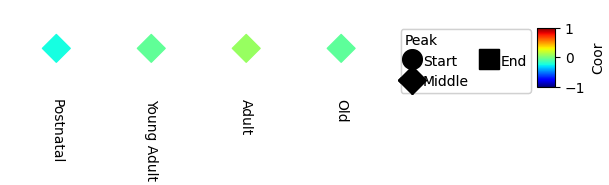

In [873]:
plt.figure(figsize=(5,1))
conservedSumDf["level_1"]=pd.Categorical(conservedSumDf["level_1"],categories=colSplitOrder)
cm = pch.DotClustermapPlotter(conservedSumDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s=1,
                               marker={'Start':'o','Middle':'D','End':'s'},ratio=200,
                              col_cluster=False,row_cluster=False,vmax=1,vmin=-1,
                             show_rownames=False,show_colnames=True)
plt.savefig("../result/24.2.22_fig5_supp//conserveSumDotplot_Age.pdf")
plt.show()

In [778]:
pd.DataFrame(peakList)

0
value    End
value    End
value  Start
value    End

In [952]:
leprIndex = np.where(trajMap.obs["Lineage"] == "Fibroblast")[0]

In [953]:
# Extract the column
geneList = travModel.loc[:, "TRAV140"]
geneList = geneList.sort_values(ascending=False)
geneList=geneList.index[0:20]

ageDf=makeLong(geneList,leprIndex)

In [954]:
ageAnno=trajMap.obs["Age"]

In [955]:
sampleAnnpo=ageAnno[leprIndex]

In [956]:
col_ha = pch.HeatmapAnnotation(Age=pch.anno_simple(sampleAnnpo,cmap='Set1',legend=False,add_text=True),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

In [957]:
row_ha = pch.HeatmapAnnotation(NMFscore=pch.anno_simple(NMFScore,cmap='Reds'),legend=False,add_text=False,
                              axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left'})

In [958]:
sampleAnnpo=sampleAnnpo.astype("str")

In [959]:
colSplitOrder=[  'Postnatal' , 'Young Adult' , 'Adult' , 'Old']

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 12.172222222222222 mm


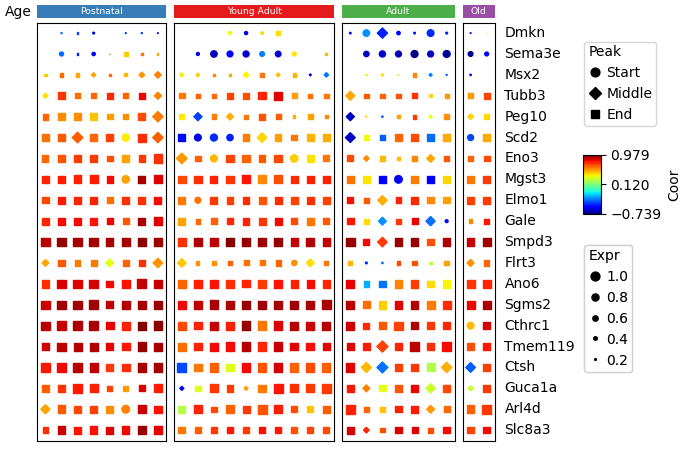

In [960]:
plt.figure(figsize=(6,5))
cm = pch.DotClustermapPlotter(ageDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s="Expr",
                               marker={'Start':'o','Middle':'D','End':'s'},row_dendrogram=False,
                              col_split_gap=2, col_split=sampleAnnpo,ratio=40,
                              top_annotation=col_ha,col_cluster=True,row_cluster=True,col_split_order=colSplitOrder,
                              show_rownames=True,show_colnames=False,spines=True)
plt.savefig("../result/24.2.22_fig5_supp/age_fibro_trav140.pdf")
plt.show()

In [586]:
sampleAnnpo

Bmsc2019_Regev_b3_sep_Chondro                                       Adult
BmscEndosteal_Ono_Fgfr3CE_sep_Chondro                           Postnatal
BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro                        Adult
BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro                         Adult
BmscEndosteal_Ono_Gas1CE_sep_Chondro                            Postnatal
BmscEndosteal_Ono_Prrx1cre18M_sep_Chondro                             Old
BmscEndosteal_Ono_Prrx1creP21_sep_Chondro                       Postnatal
BmscEndosteal_Ono_Prrx1creP21multiome_sep_Chondro               Postnatal
BmscTime_Zhong_16M_sep_Chondro                                        Old
BmscTime_Zhong_1M_sep_Chondro                                 Young Adult
BmscTime_Zhong_3M_sep_Chondro                                 Young Adult
ChondroOsteo_Long_sep_Chondro                                 Fetal stage
LimbG610C_Gorrell_femurWT2_sep_Chondro                        Fetal stage
LimbMouse2019_Kelly_E15_sep_Chondro   

In [818]:
leprIndex = np.where(trajMap.obs["Lineage"] == "Chondro")[0]

In [819]:
# Extract the column
geneList = travModel.loc[:, "TRAV120"]
geneList = geneList.sort_values(ascending=False)
geneList=geneList.index[0:20]

ageDf=makeLong(geneList,leprIndex)

In [820]:
ageAnno=trajMap.obs["Age"]

In [821]:
sampleAnnpo=ageAnno[leprIndex]

In [822]:
col_ha = pch.HeatmapAnnotation(Age=pch.anno_simple(sampleAnnpo,cmap='Set1',legend=False,add_text=True),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

In [823]:
row_ha = pch.HeatmapAnnotation(NMFscore=pch.anno_simple(NMFScore,cmap='Reds'),legend=False,add_text=False,
                              axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left'})

In [824]:
sampleAnnpo=sampleAnnpo.astype("str")

In [825]:
colSplitOrder=[  "Fetal stage",'Postnatal' , 'Young Adult' , 'Adult' , 'Old']

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 12.172222222222222 mm


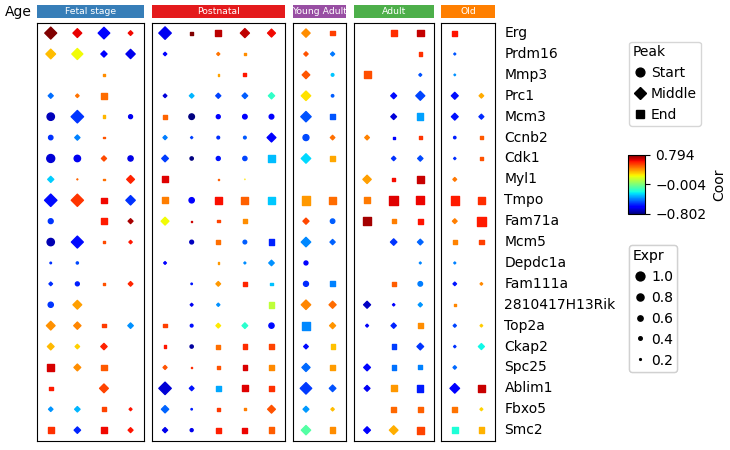

In [826]:
plt.figure(figsize=(6,5))
cm = pch.DotClustermapPlotter(ageDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s="Expr",
                               marker={'Start':'o','Middle':'D','End':'s'},row_dendrogram=False,
                              col_split_gap=2, col_split=sampleAnnpo,ratio=40,
                              top_annotation=col_ha,col_cluster=True,row_cluster=True,col_split_order=colSplitOrder,
                              show_rownames=True,show_colnames=False,spines=True)
plt.savefig("../result/24.2.22_fig5_supp/age_chondro_trav120.pdf")
plt.show()

In [964]:
trav.obs["New"]="Old"

In [967]:
trav.obs["New"][trav.obs_names=="Metaphysis_Yang_4_sep_Fibroblast"]="New"

/tmp/ipykernel_893794/1732985946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trav.obs["New"][trav.obs_names=="Metaphysis_Yang_4_sep_Fibroblast"]="New"


In [968]:
trav

AnnData object with n_obs × n_vars = 121 × 226
    obs: 'Organ', 'Stage', 'Age', 'Tissue', 'Tissue.Specific.', 'Gene.type', 'Treatment', 'Age.In.Detail.', 'Machine', 'Origin', 'Sample', 'Lineage', 'coor:mod_weight', 'expr:mod_weight', 'peak:mod_weight', 'TRAV:mod_weight', 'Age_OPC', 'TRAV120_Young', 'TRAV120_Lepr', 'TRAV120_Fibroblast', 'TRAV120_MSC', 'TRAV120_Chondrocyte', 'New'
    var: 'mean', 'std'
    uns: 'Age_OPC_colors', 'Age_colors', 'Lineage_colors', 'neighbors', 'pca', 'umap', 'rank_genes_groups'
    obsm: 'TrajMap_umap', 'X_pca', 'X_umap', 'TRAVMap_umap'
    varm: 'PCs'
    layers: 'raw', 'scale'
    obsp: 'connectivities', 'distances'

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


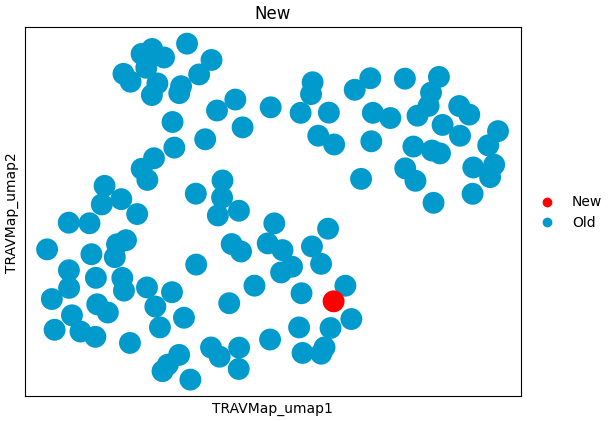

In [979]:
sc.pl.embedding(trav,color="New",basis="TRAVMap_umap",cmap="RdBu_r",save="new")

In [978]:
trav.uns["New_colors"]=["red","#009acd"]